### Random TN 

In [3]:
import numpy as np
import ast
from scipy.stats import unitary_group
import matplotlib.pyplot as plt
from quimb import *
from quimb.tensor import *
import sympy as sym

from joblib import Parallel, delayed
import pandas as pd
import time

import scipy as sp
from scipy import linalg
import pickle

#from Devicesim/JC_functions import *

In [11]:
N = 50
chi = 20

x_list = list(range(3, N-1, 2))

In [3]:
def make_MPS(theta):
    A_JC = MPS_JC_2site(chi,theta)
    BL = np.zeros((2, chi, chi))
    BL[0,0,0] = 1

    MPS_list = [A_JC for i in range(N)]
    MPS_list.insert(0, BL)
    MPS_list.append(BL)

    JC_MPS = MatrixProductState(MPS_list, shape = 'plr')
    JC_MPS.cyclic = False
    JC_MPS.normalize()

    return JC_MPS

Lets make motz:

In [20]:
pL, pR = [.2,.2]


A_Motz = MPS_Motzkin(chi, pL,pR)
BL = np.zeros((2, chi, chi))
BL[0,0,0] = 1

MPS_list = [A_Motz for i in range(N)]
MPS_list.insert(0, BL)
MPS_list.append(BL)

Motz_MPS = MatrixProductState(MPS_list, shape = 'plr')
Motz_MPS.cyclic = False
Motz_MPS.normalize()
 

0.08909648420202856

# First lets look at distrubution of chains with uniform theta 

In [4]:
samples = 800
theta_samples = 2*np.pi*np.random.random(samples)

In [5]:
MPS_samples = Parallel(n_jobs=-1)(delayed(make_MPS)(theta) for theta in theta_samples)

# Now lets compute average corr fcns

In [24]:
Z_A, Z_B = [np.kron(pauli('Z'), np.eye(2)), np.kron(np.eye(2),pauli('Z'))]
X_A, X_B = [np.kron(pauli('X'), np.eye(2)), np.kron(np.eye(2),pauli('X'))]
Y_A, Y_B = [np.kron(pauli('Y'), np.eye(2)), np.kron(np.eye(2),pauli('Y'))]


In [26]:
def ZZ(MPS):
    
    return [MPS.correlation(Z_A+Z_B,2,x) for x in x_list]

def XX(MPS):
    
    return [MPS.correlation(X_A+X_B,2,x) for x in x_list]

def YY(MPS):
    
    return [MPS.correlation(Y_A+Y_B,2,x) for x in x_list]

In [8]:
t1 = time.time()
ZZ_data = Parallel(n_jobs=-1, verbose =10)(delayed(ZZ)(MPS) for MPS in MPS_samples)

print(time.time()-t1)

with open('ZZ_random.pickle', 'wb') as file:
    pickle.dump(ZZ_data, file)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done  73 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 121 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 229 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done 258 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done 289 tasks      | elapsed: 14.9min
[Parallel(n_jobs=-1)]: Done 320 tasks      | elapsed: 15.5min
[Parallel(n_jobs=-1)]: Done 353 tasks      | elapsed: 16.1min
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed: 1

1950.9766490459442


[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed: 32.5min finished


In [9]:
t1 = time.time()
XX_data = Parallel(n_jobs=-1, verbose =10)(delayed(XX)(MPS) for MPS in MPS_samples)

print(time.time()-t1)

with open('XX_random.pickle', 'wb') as file:
    pickle.dump(XX_data, file)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done  73 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 121 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 229 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 258 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done 289 tasks      | elapsed: 15.2min
[Parallel(n_jobs=-1)]: Done 320 tasks      | elapsed: 15.6min
[Parallel(n_jobs=-1)]: Done 353 tasks      | elapsed: 15.8min
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed: 1

1947.8644323349


[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed: 32.5min finished


In [27]:
t1 = time.time()
YY_data = Parallel(n_jobs=-1, verbose =10)(delayed(YY)(MPS) for MPS in MPS_samples[:200])

print(time.time()-t1)

with open('YY_random.pickle', 'wb') as file:
    pickle.dump(YY_data, file)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done  30 out of 200 | elapsed:  4.0min remaining: 22.4min
[Parallel(n_jobs=-1)]: Done  51 out of 200 | elapsed:  4.3min remaining: 12.5min
[Parallel(n_jobs=-1)]: Done  72 out of 200 | elapsed:  4.4min remaining:  7.8min
[Parallel(n_jobs=-1)]: Done  93 out of 200 | elapsed:  4.6min remaining:  5.3min
[Parallel(n_jobs=-1)]: Done 114 out of 200 | elapsed:  7.6min remaining:  5.7min
[Parallel(n_jobs=-1)]: Done 135 out of 200 | elapsed:  7.8min remaining:  3.8min
[Parallel(n_jobs=-1)]: Done 156 out of 200 | elapsed:  8.3min remaining:  2.3min
[Parallel(n_jobs=-1)]: Done 177 out of 200 | elapsed:  8.4min remaining:  1.1min
[Parallel(n_jobs=-1)]: Done 198 out of 200 | elapsed:  8.4min remaining:    5.1s


507.0958845615387


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  8.5min finished


Let's get Motz data:

In [9]:
Zspin1 = pauli('Z', dim=3)
Xspin1 = pauli('X', dim=3)

In [22]:
ZZ_Motz = [Motz_MPS.correlation(Zspin1, 2, x) for x in x_list ]
XX_Motz = [Motz_MPS.correlation(Xspin1, 2, x) for x in x_list ]

## Now lets average this data over our theta distribution:

In [4]:
with open('XX_random.pickle', 'rb') as file:
    XX_data = pickle.load(file)

with open('ZZ_random.pickle', 'rb') as file:
    ZZ_data = pickle.load(file)

with open('YY_random.pickle', 'rb') as file:
    YY_data = pickle.load(file)

In [6]:
ZZ_mat, XX_mat, YY_mat = [np.array(ZZ_data), np.array(XX_data), np.array(YY_data)]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


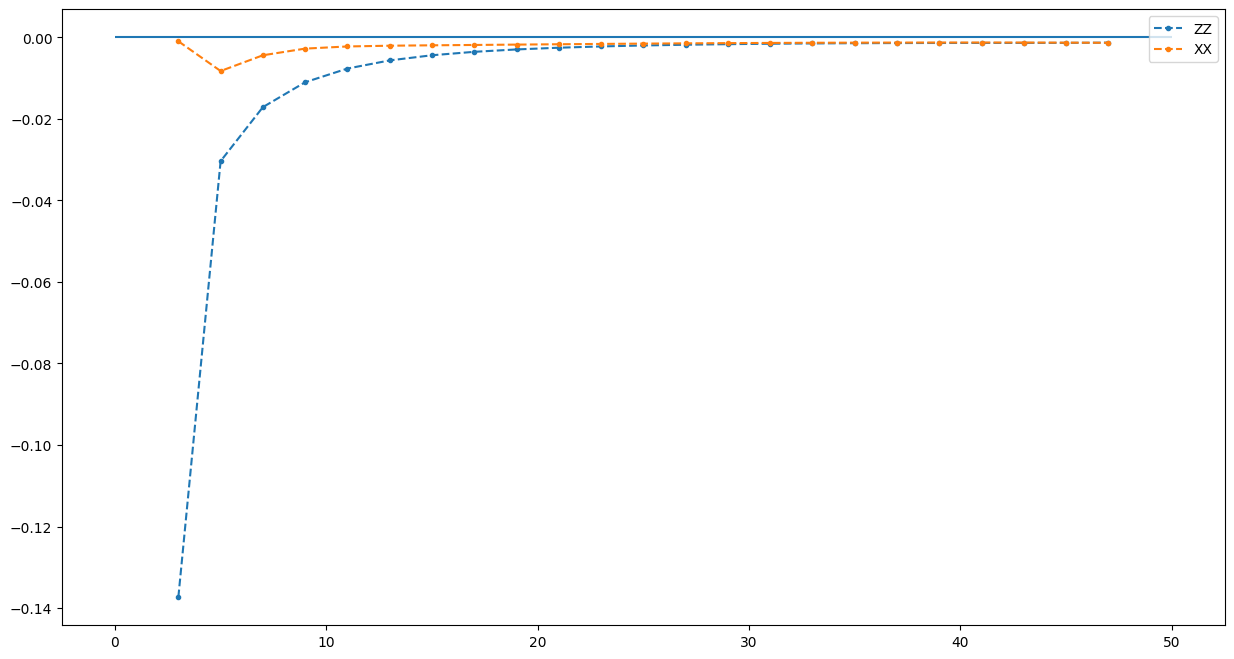

In [14]:
plt.figure(figsize=(15,8))
plt.plot(x_list, ZZ_mat.mean(axis=0), '.--', label = "ZZ")
plt.plot(x_list, XX_mat.mean(axis=0), '.--', label = 'XX')
#plt.plot(x_list,YY_mat.mean(axis =0), label = 'YY')
#plt.plot(x_list, ZZ_Motz, '.-', label = "ZZ Motz")
#plt.plot(x_list, XX_Motz, '.-', label = 'XX Motz')
plt.hlines(0,0,50)
plt.legend()

Now YY

In [16]:
2**18

262144